In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


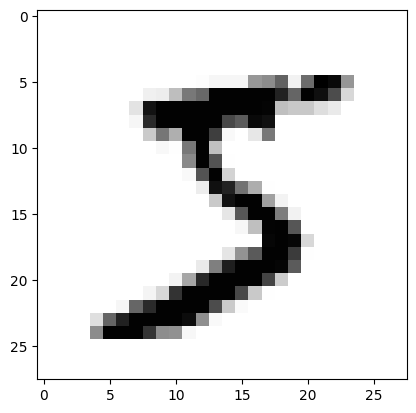

In [6]:
# 이미지 형태 출력을 위한 pyplot 모듈 import
import matplotlib.pyplot as plt
# 위 60000개 데이터 배열에서 0번째 원소를 흑백으로 출력
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [7]:
# 0번째 원소의 모든 데이터를 출력
for x in X_train[0]:
    for i in x:
        print('%3d ' % i,end='')
    print('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 

  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 

  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 

  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0 

In [8]:
# 필요 라이브러리 호출

import numpy as np
import tensorflow as tf                                    # tensorflow 기본 import
from tensorflow.keras.models import Sequential             # model box 구성
from tensorflow.keras.layers import Flatten, Dense, Input  # model 안의 input layer와
                                                           # output layer를 구성
from tensorflow.keras.utils import to_categorical

# 데이터 셋 호출
from tensorflow.keras.datasets import mnist

# 실행 시마다 같은 결과값 도출을 위한 시드 설정
np.random.seed(0)
tf.random.set_seed(0)

# 데이터를 불러와서 각 변수에 저장
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 학습에 적합한 형태로 데이터 가공
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

# 클래스를 학습에 이용하기 위해 데이터 가공
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

# 딥러닝 모델 구조 설정(2개층, 512개의 뉴런 연결, 10개 클래스 출력 뉴런, 784개 픽셀 input 값, relu와 softmax 활성화 함수 이용)
model = Sequential()
model.add(Input(shape=(784,))),             # 입력층: 784차원 입력
model.add(Dense(512, activation='relu')),  # 은닉층: 512 뉴런, ReLU 활성화
model.add(Dense(10, activation='softmax')) # 출력층: 10 클래스, Softmax


# 딥러닝 구조 설정(loss 옵션을 다중 클래스에 적합한 categorical_crossentropy, 옵티마이저는 adam 설정)
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

model.summary()

# 모델 실행(X_test, Y_test로 검증, 200개씩 30번 학습)
hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=1)

# 학습 정확도, 검증 정확도 출력
print('\nAccuracy: {:.4f}'.format(model.evaluate(X_train, Y_train)[1]))
print('\nVal_Accuracy: {:.4f}'.format(model.evaluate(X_test, Y_test)[1]))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8571 - loss: 0.5257 - val_accuracy: 0.9583 - val_loss: 0.1502
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9603 - loss: 0.1377 - val_accuracy: 0.9687 - val_loss: 0.1034
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9759 - loss: 0.0895 - val_accuracy: 0.9736 - val_loss: 0.0847
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9823 - loss: 0.0650 - val_accuracy: 0.9753 - val_loss: 0.0770
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9864 - loss: 0.0487 - val_accuracy: 0.9770 - val_loss: 0.0723
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9903 - loss: 0.0367 - val_accuracy: 0.9773 - val_loss: 0.0694
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9935 - loss: 0.0280 - val_accuracy: 0.9784 - val_loss: 0.0673
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9954 - loss: 0.0216 - val_accuracy: 0.

In [9]:
# 모델 저장
model.save('Predict_Model.keras')

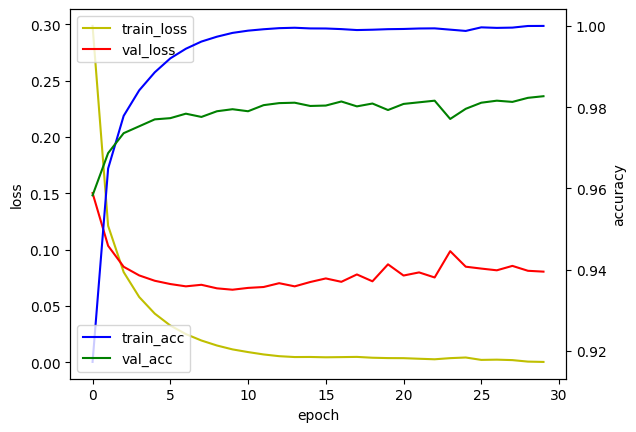

In [10]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")

In [11]:
# 딥러닝에 필요한 케라스 함수 호출
from tensorflow.keras.models import load_model
#from tensorflow.keras.utils import np_utils

# 필요 라이브러리 호출(PIL은 이미지파일 처리위함)
from PIL import Image
import numpy as np

# test.png는 그림판에서 붓으로 숫자 8을 그린 이미지 파일
# test.png 파일 열어서 L(256단계 흑백이미지)로 변환
img = Image.open("../test.png").convert("L")

# 이미지를 784개 흑백 픽셀로 사이즈 변환
img = np.resize(img, (1, 784))

# 데이터를 모델에 적용할 수 있도록 가공
test_data = ((np.array(img) / 255) - 1) * -1

# 모델 불러오기
model = load_model('Predict_Model.keras')

predictions = model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [12]:
# 가장 높은 확률을 갖는 클래스 선택
res = np.argmax(predictions, axis=1)
print(res)

[8]


In [13]:
# 클래스 예측 함수에 가공된 테스트 데이터 넣어 결과 도출
res =(model.predict(test_data) > 0.5).astype("int32")
print(res)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0 0 0 0 0 0 0 0 1 0]]
